In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('doraeiga.csv')
df.head()

,タイトル,配給収入,観客動員数,年度
0,のび太の恐竜,15.5,320.0,1980
1,のび太の宇宙開拓史,17.5,360.0,1981
2,のび太の大魔境,12.2,250.0,1982
3,のび太の海底鬼岩城,10.0,210.0,1983
4,のび太の魔界大冒険,16.5,330.0,1984


/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:15

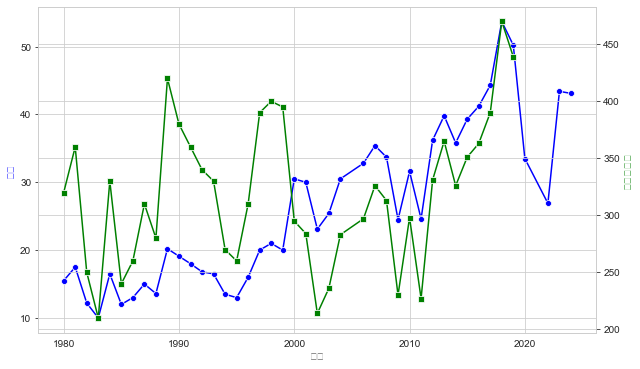

In [7]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the primary y-axis data
sns.lineplot(data=df, x="年度", y="配給収入", ax=ax1, color="blue", marker="o")

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x="年度", y="観客動員数", ax=ax2, color="green", marker="s")
ax1.set_ylabel('収入', color='blue')
ax2.set_ylabel('観客動員数', color='green')
plt.show()